<center>

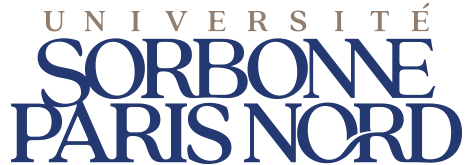

</center>

<h1><center><strong style="color: #293358">Nouveaux paradigmes de base de données<br/> BUT 3 - IUT Villetaneuse <br/> Dénormalisation et introduction à Redis</strong></center></h1>

<center>
<h3 style="color: #8b7d6d"><a href="https://gguibon.github.io/">Gaël Guibon</a></h3>
<email>gael.guibon@lipn.fr</email>
<p>#gael6674</p>
<br/>
Year 2024-2025

Original Content

Licenced under Affero GNU3
</center>

## <strong style="color: #8b7d6d">Usage de la machine virtuelle</strong>

1. Téléchargez la VM ici : https://e.pcloud.link/publink/show?code=XZ3dvxZh0fEzIaCmqF9HHRP346u0S0MY4lk
2. Importez la dans Virtual Box
3. Connectez-vous avec l'id `uspn`et le mot de passe `uspn`
4. Enjoy !


Cette machine virtuelle est déjà configurée pour Redis et il vous suffit de lancer les quelques commandes de la section suivante pour y installer MongoDB.

## <strong style="color: #8b7d6d">Installation de redis</strong>

### Windows / MacOS / Linux

1. Téléchargez Docker Desktop : https://www.docker.com/
2. Installez le en mettant tout par défaut
3. `docker run -d --name redis-stack -p 6379:6379 -p 8001:8001 redis/redis-stack:latest`

## <strong style="color: #8b7d6d">Lancement de redis (redis-stack)</strong>

### Ubuntu 24.04 LTS

In [ ]:
# verifier les conteneurs
! sudo docker ps -a

# lancer le conteneur redis
! sudo docker start redis-stack

### Windows 10 / 11

Lancez l'interface graphique de docker et activez le conteneur `redis-stack`.

## <strong style="color: #8b7d6d">Dénormalisation de la base de données Pilotes</strong>

Téléchargez la base de données `pilotes` puis décompressez la avec les commandes système suivantes (sous linux).

In [1]:
! mkdir -p pilotes
# téléchargement
! wget https://gitlab.com/gguibon/uspn-storage/-/raw/main/bddPilotes.zip
! mv bddPilotes.zip pilotes/
# décompression
! cd pilotes; unzip bddPilotes.zip

--2024-12-07 16:40:09--  https://gitlab.com/gguibon/uspn-storage/-/raw/main/bddPilotes.zip
Résolution de gitlab.com (gitlab.com)… 2606:4700:90:0:f22e:fbec:5bed:a9b9, 172.65.251.78
Connexion à gitlab.com (gitlab.com)|2606:4700:90:0:f22e:fbec:5bed:a9b9|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 5841 (5,7K) [application/octet-stream]
Enregistre : ‘bddPilotes.zip’

bddPilotes.zip      100%[===================>]   5,70K  --.-KB/s    ds 0s      

2024-12-07 16:40:09 (66,9 MB/s) - ‘bddPilotes.zip’ enregistré [5841/5841]

Archive:  bddPilotes.zip
  inflating: AVIONS.txt              
  inflating: CLIENTS.txt             
  inflating: DEFCLASSES.txt          
  inflating: PILOTES.txt             
  inflating: RESERVATIONS.txt        
  inflating: VOLS.txt                


## Représentation normalisée

Maintenant que vous avez téléchargé la base de données relationnelle ou, plus exactement, une représentation sommaire de cette base données.
Sur papier, dessinez le schéma de la base de données `pilotes`. Gardez à l'esprit que chaque fichier `.txt` correspond à une table dans la base de données relationnelle.

#### 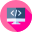 **TODO!**

In [ ]:
# code moi steupléé 🥺

## Représentation dénormalisée


Le problème que nous rencontrons, est que cette représentatin bien formalisée, avec données sans redondance et donc bien normalisée, correspond à une base de données relationnelle. Nous souhaitons cependant pouvoir l'utiliser directement dans une base de données NoSQL, comme `MongoDB` par exemple 😉.

Pour rappel, la dénormalisation correspond au fait de ne plus avoir des données en unités minimales. De plus, cela nous oblige à éviter les jointures puisque les relations ne sont plus aussi simple à gérer que dans du SQL (plus précisément, elles seront lentes et très chères en ressources car demanderont d'itérer sur plusieurs tables successivement). Nous devons donc nous affranchir du classique schéma SQL.

L'objectif est donc de dénormaliser la base de données, c'est-à-dire de fusionner les différentes tables nécessaires pour en produire une seule... Oui, il s'agit presque de faire une vue en SQL, sauf que nous ne devons simplement avoir une seule table à la fin. Attention, ce n'est pas une tâche aisée, cette étape est très importante pour comprendre les différences intrinsèques entre SQL et NoSQL, ainsi que les choix cruciaux que nous devons faire en amoont quand il s'agit de passer du premier au second paradigme de bases de données.

#### 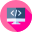 **TODO!**

À vous de jouer. Transformez la base de données `pilotes` en une base dénormalisée, pour réduire au maximum les jointures et obtenir une représentation sous forme de documents (i.e. en vue d'une utilisation pour `mongoDB`) ou autres (pratique pour l'utilisation future dans `redis` par exemple).


💡Astuces :
- Il n'existe pas qu'une seule bonne représentation. Faites vos choix !
- Pour représenter correctement, il est souvent plus simple de penser aux utilisations futures les plus fréquentes de cette base de données.
- il convient d'obtenir à la fin, des données en mémoire (donc par le biais de structures de données `dict` `list` et autres)

In [ ]:
import pandas as pd
import json, copy, pymongo
# code moi steupléé 🥺


## Usage de la base dénormalisée et premiers pas en Redis

Les données sont désormais dénormaliséés, nous pouvons donc les insérer dans notre base de données `redis`! Notre objectif est donc d'insérer ces données et de les requêter par la suite.

In [ ]:
# verifier les conteneurs
! sudo docker ps -a

# lancer le conteneur redis
! sudo docker start redis-stack

In [ ]:
import redis

#### 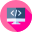 **TODO!**

Connectez vous à redis.

💡Astuces : 
- https://redis-py.readthedocs.io/en/stable/examples/connection_examples.html

In [ ]:
# code moi steupléé 🥺

#### 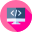 **TODO!**

Envoyez un ping à la BDD et affichez son résultat.

In [ ]:
# code moi steupléé 🥺

#### 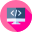 **TODO!**

Que se passe-t-il si vous utilisez le paramètre `decode_responses` quand vous vous connectez ?

In [ ]:
# code moi steupléé 🥺


#### 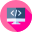 **TODO!**

Affichez les informations de votre serveur redis avec `.info()`.

In [ ]:
# code moi steupléé 🥺


#### 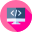 **TODO!**

Avec `redis`, créez une clé `prenom` et mettez-y votre prénom.

💡Astuces :
- Aidez-vous de la documentation des commandes pour le reste du TD : https://redis-py.readthedocs.io/en/stable/commands.html#redis.commands.core.CoreCommands.info

In [ ]:
# code moi steupléé 🥺


#### 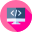 **TODO!**

Affichez le contenu de votre base de données dans redis-insights.

Allez à l'URL http://localhost:8001/.

#### 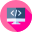 **TODO!**

Récupérez votre prénom de la base redis et affichez le.

In [ ]:
# code moi steupléé 🥺


#### 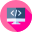 **TODO!**

Ajoutez le suffixe "_IUTV" à votre prénom puis affichez le.

In [ ]:
# code moi steupléé 🥺


#### 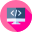 **TODO!**

Supprimez la clé `prenom`.

In [ ]:
# code moi steupléé 🥺


#### 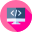 **TODO!**

Insérez vos plats préférés dans une liste avec redis. Puis affichez un élément à la fois.

In [ ]:
# code moi steupléé 🥺


#### 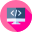 **TODO!**

Affichez le nombre de plats.

In [ ]:
# code moi steupléé 🥺


#### 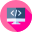 **TODO!**

Supprimez l'avant-dernier plat à l'aide de sa valeur.

In [ ]:
# code moi steupléé 🥺

#### 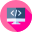 **TODO!**

Supprimez la liste des plats.

In [ ]:
# code moi steupléé 🥺


#### 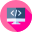 **TODO!**

Créez une clé `moi`contenant une table de hachage avec votre prénom, nom, age et activité préférée.

In [ ]:
# code moi steupléé 🥺


#### 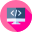 **TODO!**

Affichez votre age.

In [ ]:
# code moi steupléé 🥺


#### 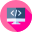 **TODO!**

De quel type est votre âge ?

In [ ]:
# code moi steupléé 🥺


#### 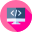 **TODO!**

Affichez toute la table de hachage `moi`.

In [ ]:
# code moi steupléé 🥺


#### 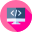 **TODO!**

Recréez cette même table de hachage mais à l'aide du paramètre `mapping`.

In [ ]:
# code moi steupléé 🥺


#### 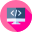 **TODO!**

Refaite cette opération mais en y ajoutant la liste des plats préférés.

In [ ]:
# code moi steupléé 🥺


#### 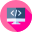 **TODO!**

Supprimez cet âge que nous ne saurions voir 😆 et affichez la table de hachage

In [ ]:
# code moi steupléé 🥺


## Utilisation de la base de pilotes dénormalisée

#### 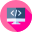 **TODO!**

Essayez d'insérer votre base de données Pilotes dénormalisée dans Redis, uniquement à l'aide des commandes dédiées (uniquement à l'aide de `CoreCommands`).

Attention, nous voulons bien utiliser ici une version adéquate pour redis, donc pour une base de données clé-valeur.

Que constatez-vous ?

In [ ]:
# code moi steupléé 🥺



#### 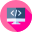 **TODO!**

Affichez la liste des destinations des vols, sans redondance, à partir de cette base dénormalisée.

Pour cela, utilisez les sets de Redis et affichez également le nombre de destinations.

In [ ]:
# code moi steupléé 🥺


#### 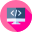 **TODO!**

Supprimez Paris de cet ensemble et affichez de nouveau les destinations différentes.

In [ ]:
# code moi steupléé 🥺


Et voila, nous avons vu 
- la dénormalisation d'une base,
- les différentes limitations et différences de base conséquente à l'orientation clé-valeur,
- les opérations de base de Redis